# Homework 1 - Time Series Analysis
# EDS 296
## Ian Morris-Sibaja

In this assignment, you will perform time series plotting for a region of your choice. The code
constructed should be in Python, and follow a format similar to the tutorials laid out in the
Climate DataLab Time Series repository (https://github.com/climate-datalab/Time-Series-Plots).
Use whatever section headings you like, so long as the tasks below are included in the notebook!
1. Locate monthly data for a historical simulation run with any two CMIP6 models of your
choice. Data may be accessed either by download from the Earth System Grid Federation
MetaGrid, or through the Amazon Web Services cloud server.
(I recommend the cloud because it saves you some wrestling with downloading data files
and getting them transferred to your local machine!)
You may choose any climate variable you like; however, note that three-dimensional data is
generally larger and can be slower to load, so I recommend either choosing a two-
dimensional data field or reading in only the surface level if you choose 3D information.
Some common choices of variables to analyze, and their CMIP names, include:
- Surface air temperature (tas)
- Precipitation (pr)
- Sea surface temperature (tos)
However, you can refer to the list of standard CMIP variables or search through the ESGF
website for others if you like!
2. Download (or write Python code to access via the cloud) data from the historical simulation,
as well as corresponding future projection information for two different future emissions
scenarios, for each model. NOTE: particularly if you’re working with the ESGF, there are
many different scenarios listed - let’s stick to the main SSPs (they will be called ‘ssp126’,
‘ssp245’, ‘ssp370’, or ‘ssp585’).
- Make sure that the historical and SSP projection information match one another: that means
they need to come from the same model and the same ensemble member. You can refer to the
Climate DataLab filename decoder if you need some guidance on how to tell!
3. Choose a region that you’re interested in to analyze, anywhere in the world. The only
constraint is that your region needs to be large enough to include at least one model grid
point (see tutorials for more information).
a. Describe, in markdown text, the climate of that region in general terms. What is it like? Is
it a forest, a desert, polar, tropical, urban, etc? What types of climate change impacts might
you expect there?
b. Read in the surface air temperature datasets from 1 and 2, and create annually averaged,
area-weighted, regionally averaged time series for your region of interest. (Examples of how
to do this can be found in the various Time Series Plots tutorials we used in class.)
Since you’re working with two models and two scenarios, this should result in four time
series — however, if you used the same historical ensemble member for multiple scenarios,
they will end up lying on top of each other and that’s ok!
4. Plot your regional time series, and fit a trend line for two different time periods:
- historical (1850-2015)
- historical plus future (1850-2100)
Over both of those time periods, is the temperature of your region changing, and is that
change statistically significant?
5. Write 1-2 paragraphs in markdown text describing the results of your plot, and what you
think they might mean for humans or ecosystems located in your study region.
To hand in the assignment, upload a PDF version of the notebook to Canvas, and include a link
to the URL for the notebook on Github (so I can find the code).
This assignment should be completed individually, but you’re free to collaborate and discuss
with classmates as you work. Just make sure that what you hand in is unique!

## Load libraries and data

In [1]:
# Load libraries
import xarray as xr
import matplotlib.pyplot as plt
import intake
import s3fs
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Open the CMIP6 data catalog, store as a variable
catalog = intake.open_esm_datastore('https://cmip6-pds.s3.amazonaws.com/pangeo-cmip6.json')
# Convert to dataframe
cat_df = catalog.df
cat_df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ta,gn,s3://cmip6-pds/CMIP6/HighResMIP/CMCC/CMCC-CM2-...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,tauv,gn,s3://cmip6-pds/CMIP6/HighResMIP/CMCC/CMCC-CM2-...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,zg,gn,s3://cmip6-pds/CMIP6/HighResMIP/CMCC/CMCC-CM2-...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,vas,gn,s3://cmip6-pds/CMIP6/HighResMIP/CMCC/CMCC-CM2-...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/HighResMIP/CMCC/CMCC-CM2-...,NaN,20170706
...,...,...,...,...,...,...,...,...,...,...,...
522212,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,uas,gr,s3://cmip6-pds/CMIP6/CMIP/EC-Earth-Consortium/...,NaN,20211207
522213,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,va,gr,s3://cmip6-pds/CMIP6/CMIP/EC-Earth-Consortium/...,NaN,20211207
522214,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,wap,gr,s3://cmip6-pds/CMIP6/CMIP/EC-Earth-Consortium/...,NaN,20211207
522215,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,tas,gr,s3://cmip6-pds/CMIP6/CMIP/EC-Earth-Consortium/...,NaN,20211207


In [3]:
# Explore the sources
cat_df.source_id.unique()

array(['CMCC-CM2-HR4', 'EC-Earth3P-HR', 'HadGEM3-GC31-MM',
       'HadGEM3-GC31-HM', 'HadGEM3-GC31-LM', 'EC-Earth3P', 'ECMWF-IFS-LR',
       'ECMWF-IFS-HR', 'HadGEM3-GC31-LL', 'CMCC-CM2-VHR4', 'GFDL-CM4',
       'GFDL-AM4', 'IPSL-CM6A-LR', 'E3SM-1-0', 'CNRM-CM6-1', 'GFDL-ESM4',
       'GFDL-CM4C192', 'GFDL-ESM2M', 'GFDL-OM4p5B', 'GISS-E2-1-G',
       'GISS-E2-1-H', 'CNRM-ESM2-1', 'BCC-CSM2-MR', 'BCC-ESM1', 'MIROC6',
       'AWI-CM-1-1-MR', 'EC-Earth3-LR', 'IPSL-CM6A-ATM-HR', 'CESM2',
       'CESM2-WACCM', 'CNRM-CM6-1-HR', 'MRI-ESM2-0', 'CanESM5',
       'SAM0-UNICON', 'GISS-E2-1-G-CC', 'UKESM1-0-LL', 'EC-Earth3',
       'EC-Earth3-Veg', 'FGOALS-f3-L', 'CanESM5-CanOE', 'INM-CM4-8',
       'INM-CM5-0', 'NESM3', 'MPI-ESM-1-2-HAM', 'CAMS-CSM1-0',
       'MPI-ESM1-2-LR', 'MPI-ESM1-2-HR', 'MRI-AGCM3-2-H', 'MRI-AGCM3-2-S',
       'MCM-UA-1-0', 'INM-CM5-H', 'KACE-1-0-G', 'NorESM2-LM',
       'FGOALS-f3-H', 'FGOALS-g3', 'MIROC-ES2L', 'FIO-ESM-2-0', 'NorCPM1',
       'NorESM1-F', 'MPI-ESM1-2-XR'

In [4]:
# Specify search terms to query catalog for the two models
# activity_id: which project do you want? CMIP = historical data, ScenarioMIP = future projections
activity_ids = ['ScenarioMIP', 'CMIP'] 

# source_id: Two models for this exercise 
source_id = ['CAMS-CSM1-0', 'MCM-UA-1-0']

# experiment_id: what experimental configuration do you want? Here we want historical and the four main SSPs
experiment_ids = ['historical', 'ssp126', 'ssp370']

# member_id: which ensemble member do you want? Here we want r1i1p1f1
member_id = 'r13i1p1f1'

# variable_id: Sea Surface Temperature 
variable_id = 'tos' 

In [5]:
# Search through catalog, store results in "res" variable
res = catalog.search(activity_id=activity_ids, source_id=source_id, experiment_id=experiment_ids, variable_id=variable_id)

res = res.df
res

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,ScenarioMIP,CAMS,CAMS-CSM1-0,ssp126,r1i1p1f1,Omon,tos,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CAMS/CAMS-CSM...,NaN,20190708
1,ScenarioMIP,CAMS,CAMS-CSM1-0,ssp370,r1i1p1f1,Omon,tos,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CAMS/CAMS-CSM...,NaN,20190708
2,CMIP,CAMS,CAMS-CSM1-0,historical,r1i1p1f1,Omon,tos,gn,s3://cmip6-pds/CMIP6/CMIP/CAMS/CAMS-CSM1-0/his...,NaN,20190708
3,CMIP,UA,MCM-UA-1-0,historical,r1i1p1f1,Omon,tos,gn,s3://cmip6-pds/CMIP6/CMIP/UA/MCM-UA-1-0/histor...,NaN,20190731
4,ScenarioMIP,UA,MCM-UA-1-0,ssp370,r1i1p1f2,Omon,tos,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/UA/MCM-UA-1-0...,NaN,20190731
5,CMIP,UA,MCM-UA-1-0,historical,r1i1p1f2,Omon,tos,gn,s3://cmip6-pds/CMIP6/CMIP/UA/MCM-UA-1-0/histor...,NaN,20190731
6,ScenarioMIP,UA,MCM-UA-1-0,ssp126,r1i1p1f2,Omon,tos,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/UA/MCM-UA-1-0...,NaN,20190731
7,CMIP,CAMS,CAMS-CSM1-0,historical,r2i1p1f1,Omon,tos,gn,s3://cmip6-pds/CMIP6/CMIP/CAMS/CAMS-CSM1-0/his...,NaN,20190829
8,ScenarioMIP,CAMS,CAMS-CSM1-0,ssp370,r2i1p1f1,Omon,tos,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CAMS/CAMS-CSM...,NaN,20190924
9,ScenarioMIP,CAMS,CAMS-CSM1-0,ssp126,r2i1p1f1,Omon,tos,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CAMS/CAMS-CSM...,NaN,20190924


In [6]:
# Dataframe for the two models
res_CSM1 = res[res['source_id'] == "CAMS-CSM1-0"]
res_MCM = res[res['source_id'] == "MCM-UA-1-0"]

## Area of Interest

I chose the Caribbean Sea as it is an ecologically important due to its high biodiversity. This includes coral reefs, mangroves, and seagrass beds, which support a diverse range of marine life and provide essential ecosystem services. Sea surface temperature (SST) is a critical factor influencing these ecosystems, and changes in SST, particularly warming, can have significant negative impacts on marine life and coastal communities. 

The bounding box for the Caribbean Sea generally encompasses the area between 10°N and 25°N latitude, and 60°W and 90°W longitude. This region includes most of the Caribbean islands and the surrounding waters. 

# Define min/max bounds for region of interest

In [7]:
lat_min, lat_max = 10, 25
lon_min, lon_max = 60, 90

## CSM1

In [8]:
# Read in CSM1 historical data
hist_data_CSM1 = xr.open_zarr(res_CSM1['zstore'][7], storage_options = {'anon':True})

# Read in CSM1 SSP126 data
ssp126_data_CSM1 = xr.open_zarr(res_CSM1['zstore'][9], storage_options = {'anon':True})

# Read in CSM1 SSP370 data
ssp370_data_CSM1 = xr.open_zarr(res_CSM1['zstore'][8], storage_options = {'anon':True})

In [9]:
# Concatenate csm1 projection data
CSM1_126 = xr.concat([hist_data_CSM1, ssp126_data_CSM1], dim = "time")
CSM1_370 = xr.concat([hist_data_CSM1, ssp370_data_CSM1], dim = 'time')

# Convert time to datetime64 format
time1_csm = CSM1_126.time.astype('datetime64[ns]')
time2_csm = CSM1_370.time.astype('datetime64[ns]')

# Look at sea surface temperature data
CSM1_126 = CSM1_126['tos']
CSM1_370 = CSM1_370['tos']

## CSM1 126 Model

In [10]:
CSM1_126

<xarray.DataArray 'tos' (time: 3000, j: 200, i: 360)>
dask.array<concatenate, shape=(3000, 200, 360), dtype=float32, chunksize=(172, 200, 360), chunktype=numpy.ndarray>
Coordinates:
  * i          (i) int32 1 2 3 4 5 6 7 8 9 ... 353 354 355 356 357 358 359 360
  * j          (j) int32 1 2 3 4 5 6 7 8 9 ... 193 194 195 196 197 198 199 200
    latitude   (j, i) float32 -81.5 -81.5 -81.5 -81.5 ... 66.04 65.63 65.21
    longitude  (j, i) float32 80.5 81.5 82.5 83.5 ... 79.86 79.9 79.94 79.98
  * time       (time) object 1850-01-16 12:00:00 ... 2099-12-16 12:00:00
Attributes:
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        Temperature of upper boundary of the liquid ocean, includ...
    history:        2019-08-19T12:09:08Z altered by CMOR: replaced missing va...
    long_name:      Sea Surface Temperature
    original_name:  temp
    standard_name:  sea_surface_temperature
    units:          degC

### Plot

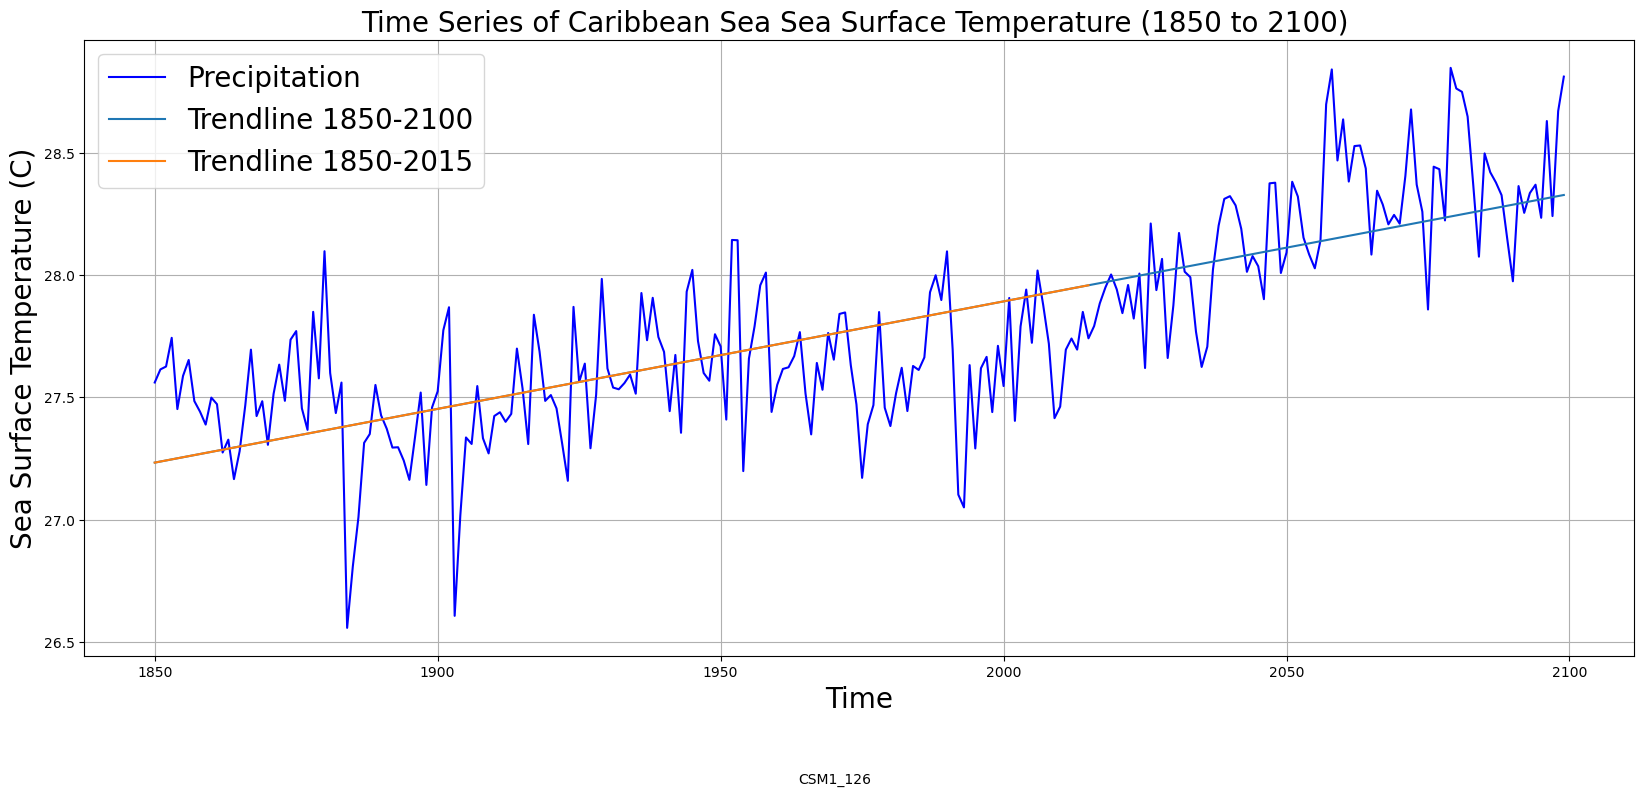

In [11]:
# Define logical mask: True when lat/lon inside the valid ranges, False elsewhere
tos_caribbean_lat = (CSM1_126.latitude >= lat_min) & (CSM1_126.latitude <= lat_max)
tos_caribbean_lon = (CSM1_126.longitude >= lon_min) & (CSM1_126.longitude <= lon_max)

# Find poits where the mask value True, drop all other points
tos_caribbean = CSM1_126.where(tos_caribbean_lat & tos_caribbean_lon, drop = True)

# Average over lat, lon dimensions to get a time series
tos_caribbean = tos_caribbean.mean(dim=['j', 'i'])


# Create annual mean for plot
annual_mean = tos_caribbean.groupby('time.year').mean()
# Calculate best-fit parameters for the linear polynomial fit of temperature to year
x = np.polyfit(annual_mean.year, annual_mean, 1)
# Generate a polynomial object using those best-fit parameters
trend_line = np.poly1d(x)  

# Trendline for filtered years 1850-2015
annual_mean_filtered = annual_mean.sel(year=slice(1850, 2015))
# Fit trendline to filtered data
x_filter = np.polyfit(annual_mean_filtered.year, annual_mean_filtered, 1)
# Create polynomial trendline function
trend_line_filter = np.poly1d(x_filter)

# Plot 
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(annual_mean.year, annual_mean, label='Precipitation', color='b')
ax.plot(annual_mean.year, trend_line(annual_mean.year), 
        label = "Trendline 1850-2100")
ax.plot(annual_mean_filtered.year, trend_line(annual_mean_filtered.year),
       label = "Trendline 1850-2015")

# Labels
ax.set_title("Time Series of Caribbean Sea Sea Surface Temperature (1850 to 2100) ", fontsize=20)
ax.set_xlabel("Time", fontsize=20)
ax.set_ylabel("Sea Surface Temperature (C)", fontsize=20)
fig.text(0.5, -0.05, 'CSM1_126', ha='center')

# Legend and show
ax.legend(fontsize=20)
ax.grid()
plt.show()

## CSM1 370 Model

In [12]:
CSM1_370

<xarray.DataArray 'tos' (time: 3000, j: 200, i: 360)>
dask.array<concatenate, shape=(3000, 200, 360), dtype=float32, chunksize=(343, 200, 360), chunktype=numpy.ndarray>
Coordinates:
  * i          (i) int32 1 2 3 4 5 6 7 8 9 ... 353 354 355 356 357 358 359 360
  * j          (j) int32 1 2 3 4 5 6 7 8 9 ... 193 194 195 196 197 198 199 200
    latitude   (j, i) float32 -81.5 -81.5 -81.5 -81.5 ... 66.04 65.63 65.21
    longitude  (j, i) float32 80.5 81.5 82.5 83.5 ... 79.86 79.9 79.94 79.98
  * time       (time) object 1850-01-16 12:00:00 ... 2099-12-16 12:00:00
Attributes:
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        Temperature of upper boundary of the liquid ocean, includ...
    history:        2019-08-19T12:09:08Z altered by CMOR: replaced missing va...
    long_name:      Sea Surface Temperature
    original_name:  temp
    standard_name:  sea_surface_temperature
    units:          degC

### Plot

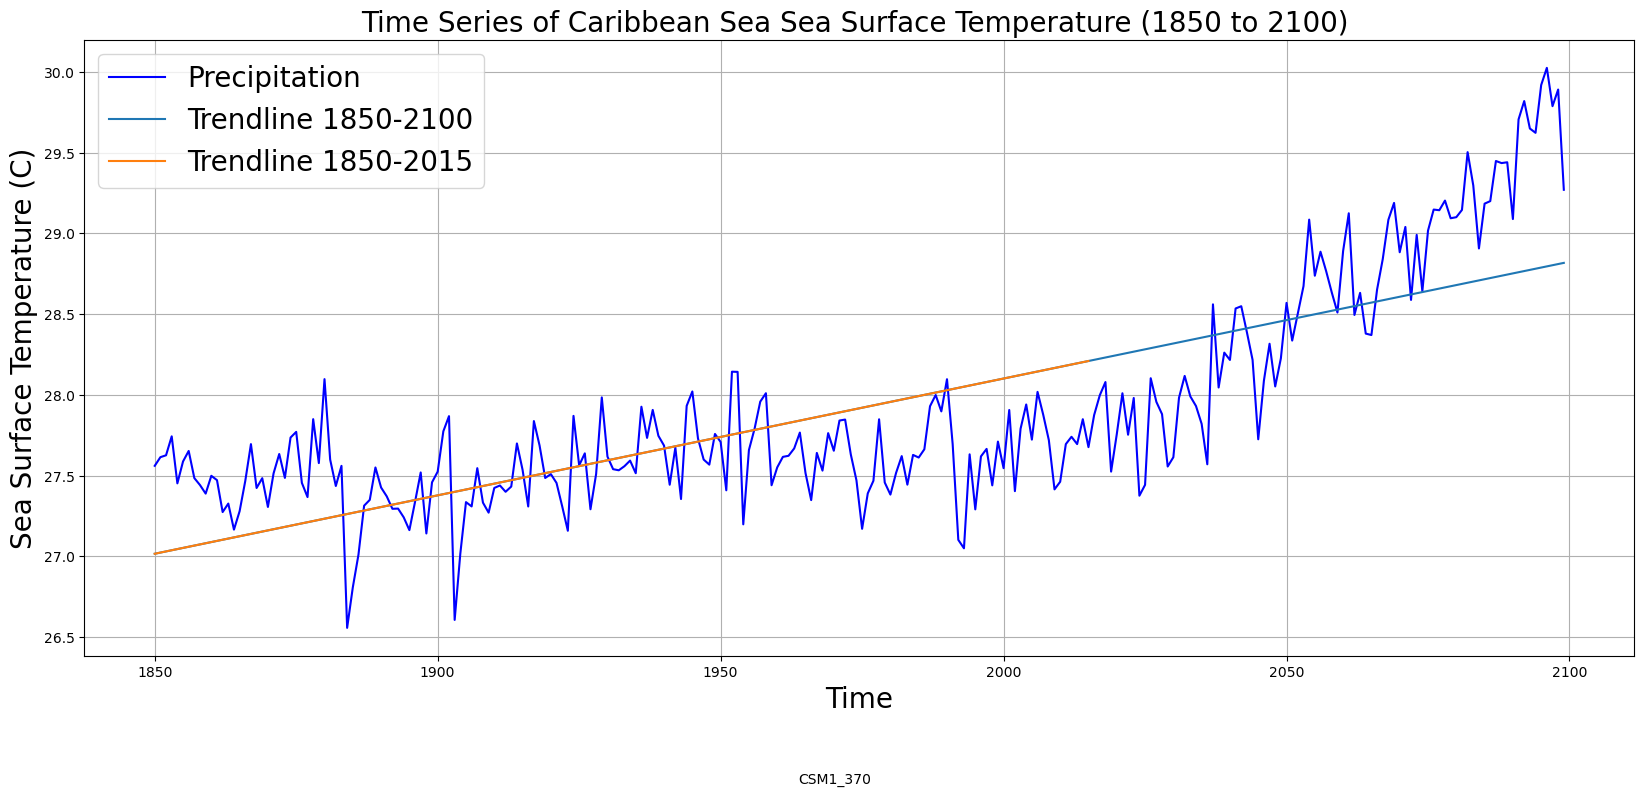

In [13]:
# Define logical mask: True when lat/lon inside the valid ranges, False elsewhere
tos_caribbean_lat = (CSM1_370.latitude >= lat_min) & (CSM1_370.latitude <= lat_max)
tos_caribbean_lon = (CSM1_370.longitude >= lon_min) & (CSM1_370.longitude <= lon_max)

# Find poits where the mask value True, drop all other points
tos_caribbean = CSM1_370.where(tos_caribbean_lat & tos_caribbean_lon, drop = True)

# Average over lat, lon dimensions to get a time series
tos_caribbean = tos_caribbean.mean(dim=['j', 'i'])


# Create annual mean for plot
annual_mean = tos_caribbean.groupby('time.year').mean()
# Calculate best-fit parameters for the linear polynomial fit of temperature to year
x = np.polyfit(annual_mean.year, annual_mean, 1)
# Generate a polynomial object using those best-fit parameters
trend_line = np.poly1d(x)  

# Trendline for filtered years 1850-2015
annual_mean_filtered = annual_mean.sel(year=slice(1850, 2015))
# Fit trendline to filtered data
x_filter = np.polyfit(annual_mean_filtered.year, annual_mean_filtered, 1)
# Create polynomial trendline function
trend_line_filter = np.poly1d(x_filter)

# Plot 
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(annual_mean.year, annual_mean, label='Precipitation', color='b')
ax.plot(annual_mean.year, trend_line(annual_mean.year), 
        label = "Trendline 1850-2100")
ax.plot(annual_mean_filtered.year, trend_line(annual_mean_filtered.year),
       label = "Trendline 1850-2015")

# Labels
ax.set_title("Time Series of Caribbean Sea Sea Surface Temperature (1850 to 2100) ", fontsize=20)
ax.set_xlabel("Time", fontsize=20)
ax.set_ylabel("Sea Surface Temperature (C)", fontsize=20)
fig.text(0.5, -0.05, 'CSM1_370', ha='center')

# Legend and show
ax.legend(fontsize=20)
ax.grid()
plt.show()

## MCM

In [14]:
res_MCM

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
3,CMIP,UA,MCM-UA-1-0,historical,r1i1p1f1,Omon,tos,gn,s3://cmip6-pds/CMIP6/CMIP/UA/MCM-UA-1-0/histor...,NaN,20190731
4,ScenarioMIP,UA,MCM-UA-1-0,ssp370,r1i1p1f2,Omon,tos,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/UA/MCM-UA-1-0...,NaN,20190731
5,CMIP,UA,MCM-UA-1-0,historical,r1i1p1f2,Omon,tos,gn,s3://cmip6-pds/CMIP6/CMIP/UA/MCM-UA-1-0/histor...,NaN,20190731
6,ScenarioMIP,UA,MCM-UA-1-0,ssp126,r1i1p1f2,Omon,tos,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/UA/MCM-UA-1-0...,NaN,20190731


In [15]:
# Read in CSM1 historical data
hist_data_MCM = xr.open_zarr(res_MCM['zstore'][5], storage_options = {'anon':True})

# Read in CSM1 SSP126 data
ssp126_data_MCM = xr.open_zarr(res_MCM['zstore'][6], storage_options = {'anon':True})

# Read in CSM1 SSP370 data
ssp370_data_MCM = xr.open_zarr(res_MCM['zstore'][4], storage_options = {'anon':True})

In [16]:
# Concatenate MCM projection data
MCM_126 = xr.concat([hist_data_MCM, ssp126_data_MCM], dim = "time")
MCM_370 = xr.concat([hist_data_MCM, ssp370_data_MCM], dim = 'time')

# Convert time to datetime64 format
time1_MCM = MCM_126.time.astype('datetime64[ns]')
time2_MCM = MCM_370.time.astype('datetime64[ns]')

# Look at sea surface temperature data
MCM_126 = MCM_126['tos']
MCM_370 = MCM_370['tos']

## MCM 126 Model

In [17]:
MCM_126

<xarray.DataArray 'tos' (time: 3012, latitude: 80, longitude: 192)>
dask.array<concatenate, shape=(3012, 80, 192), dtype=float32, chunksize=(813, 80, 192), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -88.63 -86.13 -83.88 ... 83.88 86.13 88.63
  * longitude  (longitude) float64 -0.9375 0.9375 2.812 ... 353.4 355.3 357.2
  * time       (time) object 1850-01-17 00:00:00 ... 2100-12-17 00:00:00
Attributes:
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    long_name:      Sea Surface Temperature                               
    standard_name:  sea_surface_temperature
    table_id:       Omon
    units:          degC

### Plot

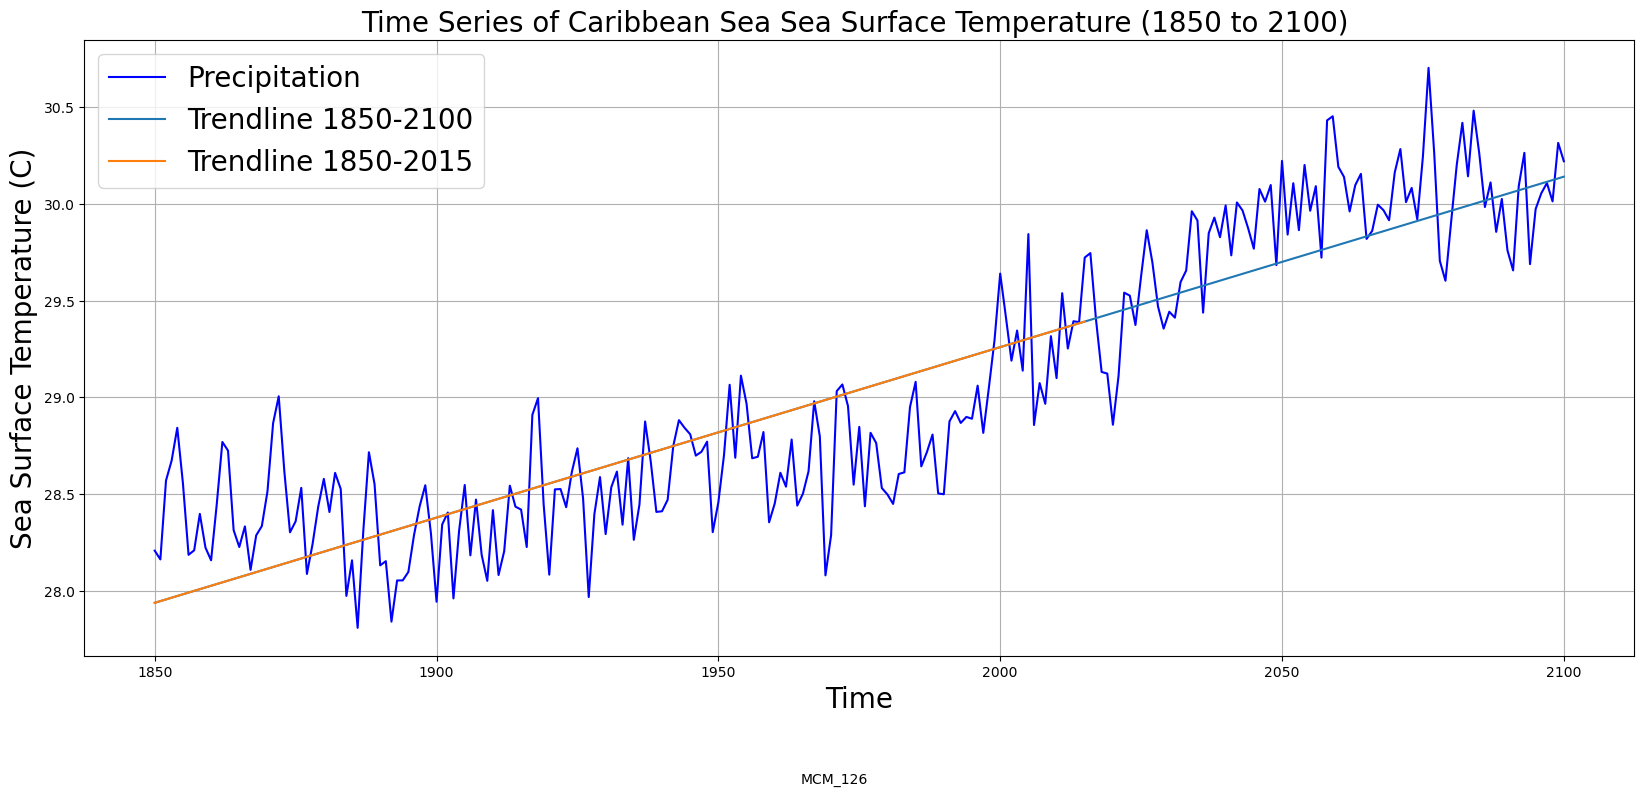

In [18]:
# Define logical mask: True when lat/lon inside the valid ranges, False elsewhere
tos_caribbean_lat = (MCM_126.latitude >= lat_min) & (MCM_126.latitude <= lat_max)
tos_caribbean_lon = (MCM_126.longitude >= lon_min) & (MCM_126.longitude <= lon_max)

# Find poits where the mask value True, drop all other points
tos_caribbean = MCM_126.where(tos_caribbean_lat & tos_caribbean_lon, drop = True)

# Average over lat, lon dimensions to get a time series
tos_caribbean = tos_caribbean.mean(dim=['longitude', 'latitude'])


# Create annual mean for plot
annual_mean = tos_caribbean.groupby('time.year').mean()
# Calculate best-fit parameters for the linear polynomial fit of temperature to year
x = np.polyfit(annual_mean.year, annual_mean, 1)
# Generate a polynomial object using those best-fit parameters
trend_line = np.poly1d(x)  

# Trendline for filtered years 1850-2015
annual_mean_filtered = annual_mean.sel(year=slice(1850, 2015))
# Fit trendline to filtered data
x_filter = np.polyfit(annual_mean_filtered.year, annual_mean_filtered, 1)
# Create polynomial trendline function
trend_line_filter = np.poly1d(x_filter)

# Plot 
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(annual_mean.year, annual_mean, label='Precipitation', color='b')
ax.plot(annual_mean.year, trend_line(annual_mean.year), 
        label = "Trendline 1850-2100")
ax.plot(annual_mean_filtered.year, trend_line(annual_mean_filtered.year),
       label = "Trendline 1850-2015")

# Labels
ax.set_title("Time Series of Caribbean Sea Sea Surface Temperature (1850 to 2100) ", fontsize=20)
ax.set_xlabel("Time", fontsize=20)
ax.set_ylabel("Sea Surface Temperature (C)", fontsize=20)
fig.text(0.5, -0.05, 'MCM_126', ha='center')
# Legend and show
ax.legend(fontsize=20)
ax.grid()
plt.show()

## MCM 370 Model

In [19]:
MCM_370

<xarray.DataArray 'tos' (time: 3012, latitude: 80, longitude: 192)>
dask.array<concatenate, shape=(3012, 80, 192), dtype=float32, chunksize=(813, 80, 192), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -88.63 -86.13 -83.88 ... 83.88 86.13 88.63
  * longitude  (longitude) float64 -0.9375 0.9375 2.812 ... 353.4 355.3 357.2
  * time       (time) object 1850-01-17 00:00:00 ... 2100-12-17 00:00:00
Attributes:
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    long_name:      Sea Surface Temperature                               
    standard_name:  sea_surface_temperature
    table_id:       Omon
    units:          degC

### Plot

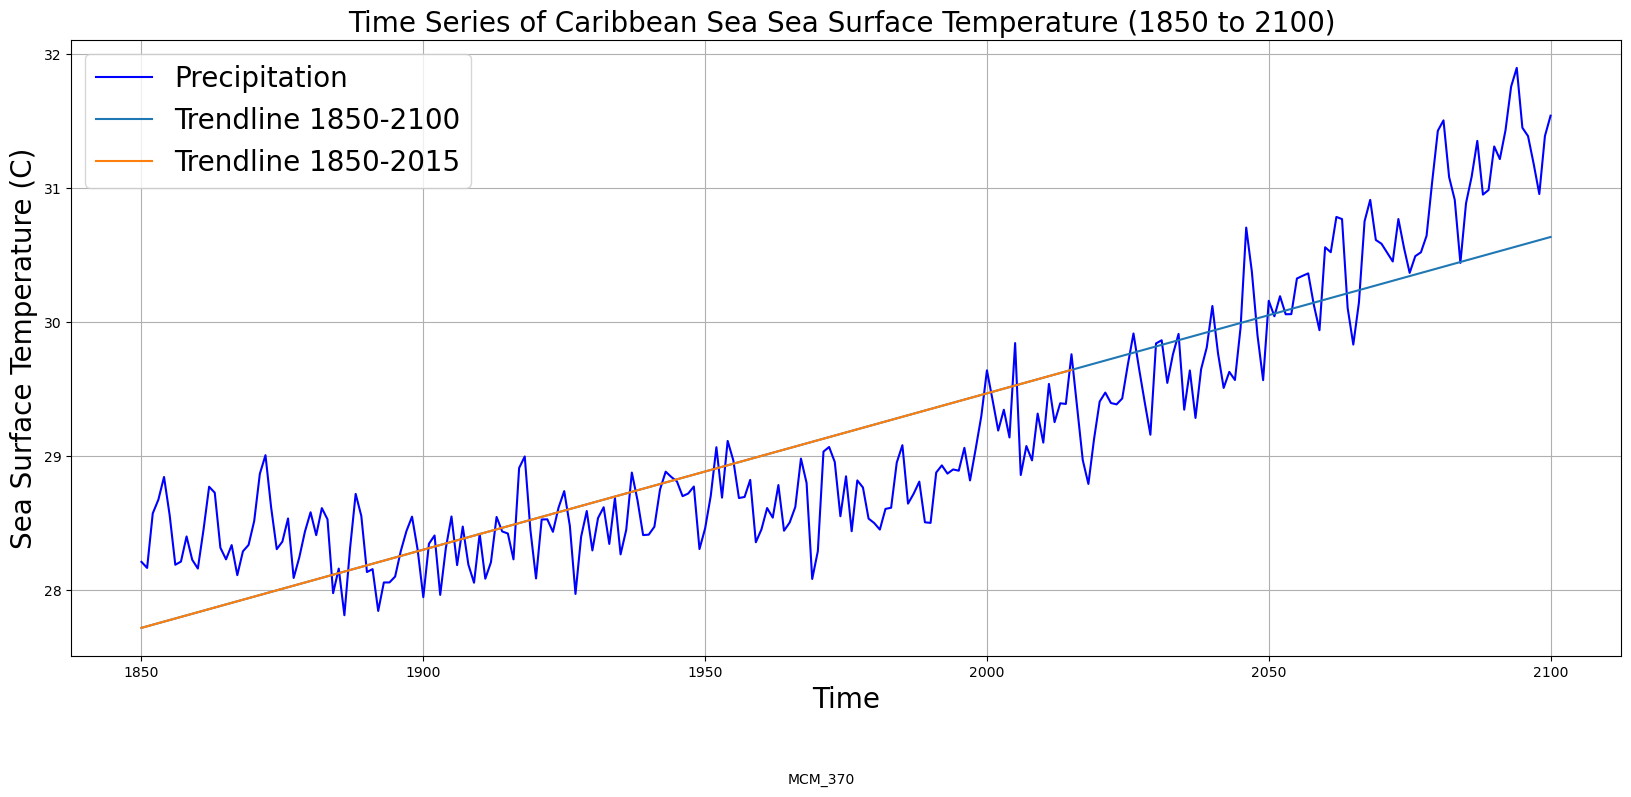

In [20]:
# Define logical mask: True when lat/lon inside the valid ranges, False elsewhere
tos_caribbean_lat = (MCM_370.latitude >= lat_min) & (MCM_370.latitude <= lat_max)
tos_caribbean_lon = (MCM_370.longitude >= lon_min) & (MCM_370.longitude <= lon_max)

# Find poits where the mask value True, drop all other points
tos_caribbean = MCM_370.where(tos_caribbean_lat & tos_caribbean_lon, drop = True)

# Average over lat, lon dimensions to get a time series
tos_caribbean = tos_caribbean.mean(dim=['longitude', 'latitude'])


# Create annual mean for plot
annual_mean = tos_caribbean.groupby('time.year').mean()
# Calculate best-fit parameters for the linear polynomial fit of temperature to year
x = np.polyfit(annual_mean.year, annual_mean, 1)
# Generate a polynomial object using those best-fit parameters
trend_line = np.poly1d(x)  

# Trendline for filtered years 1850-2015
annual_mean_filtered = annual_mean.sel(year=slice(1850, 2015))
# Fit trendline to filtered data
x_filter = np.polyfit(annual_mean_filtered.year, annual_mean_filtered, 1)
# Create polynomial trendline function
trend_line_filter = np.poly1d(x_filter)

# Plot 
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(annual_mean.year, annual_mean, label='Precipitation', color='b')
ax.plot(annual_mean.year, trend_line(annual_mean.year), 
        label = "Trendline 1850-2100")
ax.plot(annual_mean_filtered.year, trend_line(annual_mean_filtered.year),
       label = "Trendline 1850-2015")

# Labels
ax.set_title("Time Series of Caribbean Sea Sea Surface Temperature (1850 to 2100) ", fontsize=20)
ax.set_xlabel("Time", fontsize=20)
ax.set_ylabel("Sea Surface Temperature (C)", fontsize=20)
fig.text(0.5, -0.05, 'MCM_370', ha='center')

# Legend and show
ax.legend(fontsize=20)
ax.grid()
plt.show()

# Weigh Grid Cells By Area

We might notice that our trendlines are very horizontal, suggesting that there might not be any changes in precipitation over time for the four scenarios. We need to take into account that each grid cell has a different area because the earth is spherical. Let's do the same process, but weighting our grid cells first.

In [21]:
# Define function to generate area weights
def weigh_MCM(dat):
    # Calculate weighting factor = cosine of latitude
    coslat = np.cos(np.deg2rad(dat.latitude))
    weight_factor = coslat / coslat.mean(dim='latitude')
    
    # Weight all points by the weighting factor
    computed_weight = dat * weight_factor
    
    # Return the set of weights: this has dimension equal to that of the input data
    return computed_weight

In [22]:
# Define function to generate area weights
def weigh_CSM(dat):
    # Calculate weighting factor = cosine of latitude
    coslat = np.cos(np.deg2rad(dat.latitude))
    weight_factor = coslat / coslat.mean(dim='j')
    
    # Weight all points by the weighting factor
    computed_weight = dat * weight_factor
    
    # Return the set of weights: this has dimension equal to that of the input data
    return computed_weight

In [23]:
# Calculate weighted scenario for all four models
weighted_CSM1_126 = weigh_CSM(CSM1_126)

weighted_CSM1_370 = weigh_CSM(CSM1_370)

weighted_MCM_126 = weigh_MCM(MCM_126)

weighted_MCM_370 = weigh_MCM(MCM_370)

# Calculate Annual Mean Temp for all fource scenarios
weighted_CSM1_126 = weighted_CSM1_126.mean(dim=['j', 'i'])

weighted_CSM1_370 = weighted_CSM1_370.mean(dim=['j', 'i'])

weighted_MCM_126 = weighted_MCM_126.mean(dim=['latitude', 'longitude'])

weighted_MCM_370 = weighted_MCM_370.mean(dim=['latitude', 'longitude'])

## Calculating New Annuals Based off Weighted Values

In [24]:
# CSM Scenario 1
weighted_CSM1_126 = weighted_CSM1_126
annual_weighted_CSM1_126 = weighted_CSM1_126.groupby('time.year').mean()

# CSM Scenario 2
weighted_CSM1_370 = weighted_CSM1_370
annual_weighted_CSM1_370 = weighted_CSM1_370.groupby('time.year').mean()

# CM2 Scenario 1
weighted_MCM_126 = weighted_MCM_126
annual_weighted_MCM_126 = weighted_MCM_126.groupby('time.year').mean()

# CM2 Scenario 2
weighted_MCM_370 = weighted_MCM_370
annual_weighted_MCM_370 = weighted_MCM_370.groupby('time.year').mean()

## Replot all scenarios

### CSM1 126

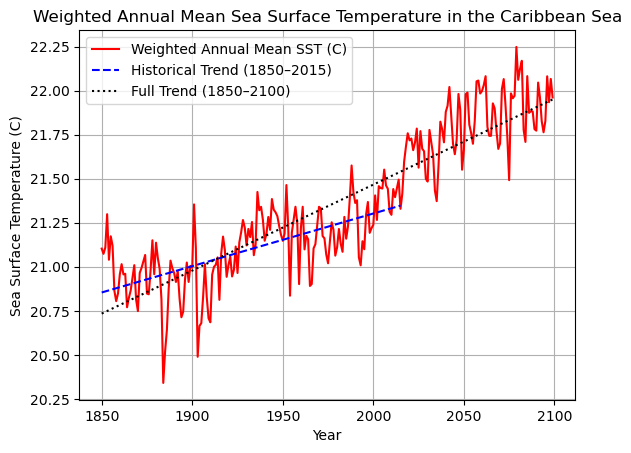

In [25]:
historical_mask = (annual_weighted_CSM1_126.year >= 1850) & (annual_weighted_CSM1_126.year <= 2015)
future_mask = (annual_weighted_CSM1_126.year > 2015)

# Full range
years_full = annual_weighted_CSM1_126.year
values_full = annual_weighted_CSM1_126

# Historical range
years_hist = annual_weighted_CSM1_126.year[historical_mask]
values_hist = annual_weighted_CSM1_126[historical_mask]

# Fit trendlines
coeffs_hist = np.polyfit(years_hist, values_hist, 1)
trend_hist = np.poly1d(coeffs_hist)

coeffs_full = np.polyfit(years_full, values_full, 1)
trend_full = np.poly1d(coeffs_full)

# Plotting
plt.figure()

# Plot data
plt.plot(years_full, values_full, label='Weighted Annual Mean SST (C)', color='red')

# Plot trendlines
plt.plot(years_hist, trend_hist(years_hist), label='Historical Trend (1850–2015)', color='blue', linestyle='--')
plt.plot(years_full, trend_full(years_full), label='Full Trend (1850–2100)', color='black', linestyle=':')

# Labels
plt.xlabel('Year')
plt.title('Weighted Annual Mean Sea Surface Temperature in the Caribbean Sea')
plt.ylabel("Sea Surface Temperature (C)")

# Legend and grid
plt.legend()
plt.grid()
plt.show()

### CSM1 370

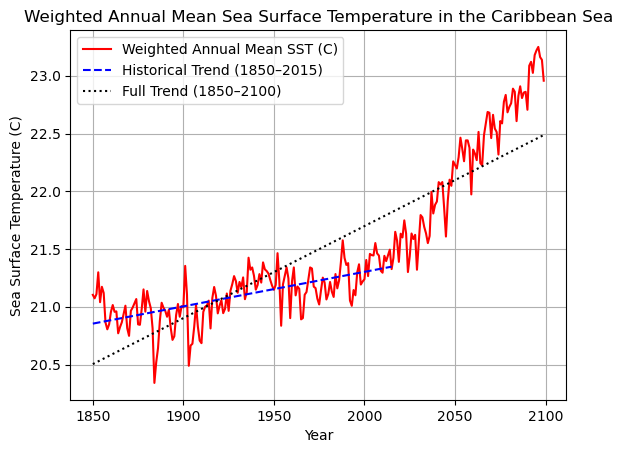

In [26]:
historical_mask = (annual_weighted_CSM1_370.year >= 1850) & (annual_weighted_CSM1_370.year <= 2015)
future_mask = (annual_weighted_CSM1_370.year > 2015)

# Full range
years_full = annual_weighted_CSM1_370.year
values_full = annual_weighted_CSM1_370

# Historical range
years_hist = annual_weighted_CSM1_370.year[historical_mask]
values_hist = annual_weighted_CSM1_370[historical_mask]

# Fit trendlines
coeffs_hist = np.polyfit(years_hist, values_hist, 1)
trend_hist = np.poly1d(coeffs_hist)

coeffs_full = np.polyfit(years_full, values_full, 1)
trend_full = np.poly1d(coeffs_full)

# Plotting
plt.figure()

# Plot data
plt.plot(years_full, values_full, label='Weighted Annual Mean SST (C)', color='red')

# Plot trendlines
plt.plot(years_hist, trend_hist(years_hist), label='Historical Trend (1850–2015)', color='blue', linestyle='--')
plt.plot(years_full, trend_full(years_full), label='Full Trend (1850–2100)', color='black', linestyle=':')

# Labels
plt.xlabel('Year')
plt.title('Weighted Annual Mean Sea Surface Temperature in the Caribbean Sea')
plt.ylabel("Sea Surface Temperature (C)")

# Legend and grid
plt.legend()
plt.grid()
plt.show()

### MCM 126

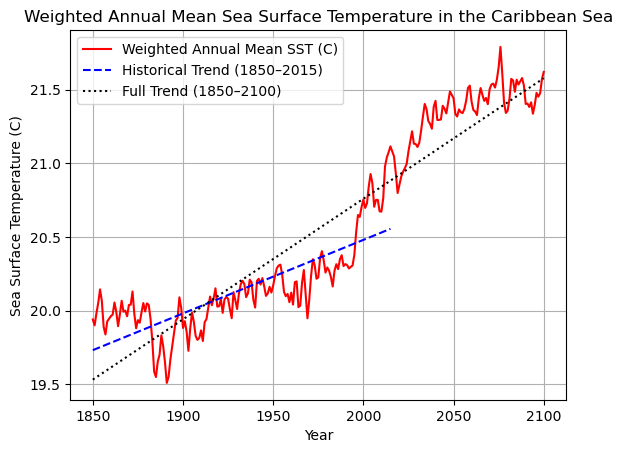

In [27]:
historical_mask = (annual_weighted_MCM_126.year >= 1850) & (annual_weighted_MCM_126.year <= 2015)
future_mask = (annual_weighted_MCM_126.year > 2015)

# Full range
years_full = annual_weighted_MCM_126.year
values_full = annual_weighted_MCM_126

# Historical range
years_hist = annual_weighted_MCM_126.year[historical_mask]
values_hist = annual_weighted_MCM_126[historical_mask]

# Fit trendlines
coeffs_hist = np.polyfit(years_hist, values_hist, 1)
trend_hist = np.poly1d(coeffs_hist)

coeffs_full = np.polyfit(years_full, values_full, 1)
trend_full = np.poly1d(coeffs_full)

# Plotting
plt.figure()

# Plot data
plt.plot(years_full, values_full, label='Weighted Annual Mean SST (C)', color='red')

# Plot trendlines
plt.plot(years_hist, trend_hist(years_hist), label='Historical Trend (1850–2015)', color='blue', linestyle='--')
plt.plot(years_full, trend_full(years_full), label='Full Trend (1850–2100)', color='black', linestyle=':')

# Labels
plt.xlabel('Year')
plt.title('Weighted Annual Mean Sea Surface Temperature in the Caribbean Sea')
plt.ylabel("Sea Surface Temperature (C)")

# Legend and grid
plt.legend()
plt.grid()
plt.show()

### MCM 370

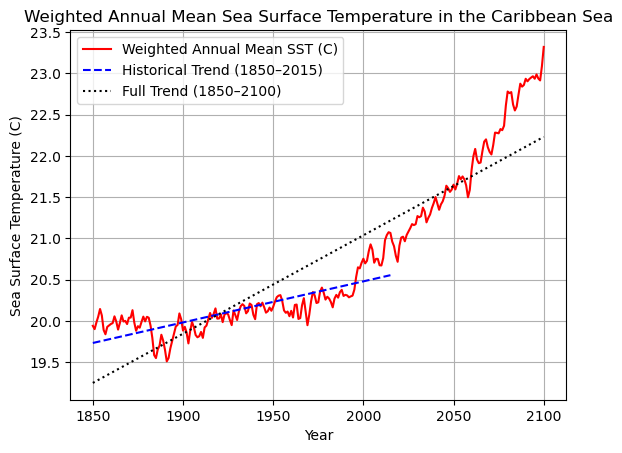

In [28]:
historical_mask = (annual_weighted_MCM_370.year >= 1850) & (annual_weighted_MCM_370.year <= 2015)
future_mask = (annual_weighted_MCM_370.year > 2015)

# Full range
years_full = annual_weighted_MCM_370.year
values_full = annual_weighted_MCM_370

# Historical range
years_hist = annual_weighted_MCM_370.year[historical_mask]
values_hist = annual_weighted_MCM_370[historical_mask]

# Fit trendlines
coeffs_hist = np.polyfit(years_hist, values_hist, 1)
trend_hist = np.poly1d(coeffs_hist)

coeffs_full = np.polyfit(years_full, values_full, 1)
trend_full = np.poly1d(coeffs_full)

# Plotting
plt.figure()

# Plot data
plt.plot(years_full, values_full, label='Weighted Annual Mean SST (C)', color='red')

# Plot trendlines
plt.plot(years_hist, trend_hist(years_hist), label='Historical Trend (1850–2015)', color='blue', linestyle='--')
plt.plot(years_full, trend_full(years_full), label='Full Trend (1850–2100)', color='black', linestyle=':')

# Labels
plt.xlabel('Year')
plt.title('Weighted Annual Mean Sea Surface Temperature in the Caribbean Sea')
plt.ylabel("Sea Surface Temperature (C)")

# Legend and grid
plt.legend()
plt.grid()
plt.show()

## Conculsion

The Caribbean Sea is a region of great ecological importance, and the results of this analysis suggest that the region is likely to experience significant warming in the future. The trend lines for both models and scenarios indicate a clear upward trajectory in sea surface temperatures, with the MCM 370 model showing a more pronounced increase than either of the CSM1 models. Sea water warming could has implications for marine ecosystems, including coral bleaching, shifts in species distributions, and changes in ocean circulation patterns. 

It is interesting to note that the MCM 126 model has a much lower increase than any of the other models, which the MCM 370 is much more pronounced. The CSM1 models are more or less similar in trend. 

Another observation to know is before weighing, the temperatures were around 30 degress, where as now they are in the low to mid 20s. This could lead to an error in the analysis, as the models are now accounting for area of the grid cells, but the baseline numbers are not systematically correct. Regardless, there is a upward trend in the data, and a large increase in temperature is expected in the future.